In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
df = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['Species'] = encoder.fit_transform(df['Species'])

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [ ]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

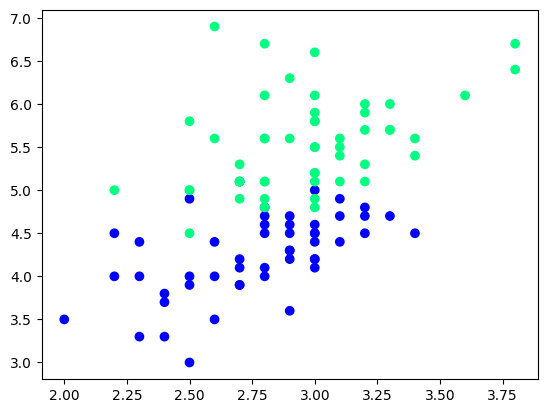

In [ ]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [ ]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
92,2.6,4.0,1
78,2.9,4.5,1
51,3.2,4.5,1
53,2.3,4.0,1
56,3.3,4.7,1
98,2.5,3.0,1
75,3.0,4.4,1
106,2.5,4.5,2
85,3.4,4.5,1
77,3.0,5.0,1


In [ ]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [ ]:
df_train

,SepalWidthCm,PetalLengthCm,Species
139,3.1,5.4,2
78,2.9,4.5,1
113,2.5,5.0,2
120,3.2,5.7,2
55,2.8,4.5,1
83,2.7,5.1,1
54,2.8,4.6,1
94,2.7,4.2,1
136,3.4,5.6,2
140,3.1,5.6,2


In [ ]:
df_val

,SepalWidthCm,PetalLengthCm,Species
99,2.8,4.1,1
104,3.0,5.8,2
63,2.9,4.7,1
124,3.3,5.7,2
93,2.3,3.3,1


In [ ]:
df_test

,SepalWidthCm,PetalLengthCm,Species
111,2.7,5.3,2
145,3.0,5.2,2
142,2.7,5.1,2
64,2.9,3.6,1
119,2.2,5.0,2


In [ ]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [ ]:
y_test

array([1, 2, 1, 2, 1])

# Case 1 - Bagging

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
140,3.1,5.6,2
94,2.7,4.2,1
140,3.1,5.6,2
139,3.1,5.4,2
78,2.9,4.5,1
136,3.4,5.6,2
54,2.8,4.6,1
136,3.4,5.6,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [ ]:
dt_bag1 = DecisionTreeClassifier()

In [ ]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.8 MB/s eta 0:00:00


In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
78,2.9,4.5,1
83,2.7,5.1,1
94,2.7,4.2,1
139,3.1,5.4,2
120,3.2,5.7,2
136,3.4,5.6,2
140,3.1,5.6,2
140,3.1,5.6,2


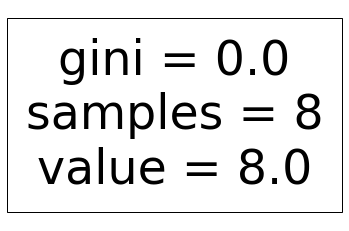

0.6


/opt/conda/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


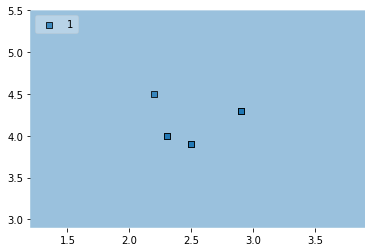

In [ ]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
101,2.7,5.1,2
97,2.9,4.3,1
65,3.1,4.4,1
97,2.9,4.3,1
65,3.1,4.4,1
87,2.3,4.4,1
69,2.5,3.9,1


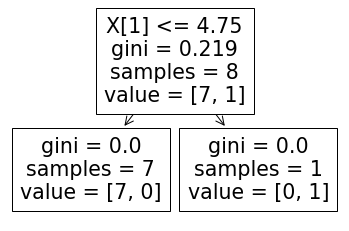

0.8


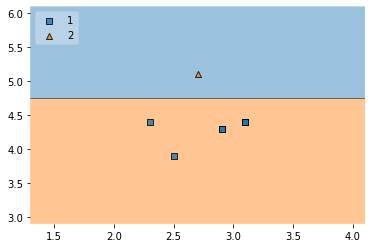

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [ ]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


## Predict

In [ ]:
df_test

,SepalWidthCm,PetalLengthCm,Species
58,2.9,4.6,1
88,3.0,4.1,1
124,3.3,5.7,2
119,2.2,5.0,2
72,2.5,4.9,1


In [ ]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]


# Pasting

In [ ]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
131,3.8,6.4,2
137,3.1,5.5,2
130,2.8,6.1,2
145,3.0,5.2,2
52,3.1,4.9,1
96,2.9,4.2,1
75,3.0,4.4,1
100,3.3,6.0,2
53,2.3,4.0,1


In [ ]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
131,3.8,6.4,2
52,3.1,4.9,1
122,2.8,6.7,2
130,2.8,6.1,2
53,2.3,4.0,1
96,2.9,4.2,1
145,3.0,5.2,2
75,3.0,4.4,1
